# Первое домашнее задание "Предсказание болезней сердца"


## Ссылки на материалы, которые я разворовывал и разбирал
- Сылка на сам датасэт: https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset/data
- разбор индусом данного датасэта, куда ж без индусов:

https://www.youtube.com/watch?v=75OJvlhFUMY

https://www.youtube.com/watch?v=qmqCYC-MBQo

- ссылка на его ноутбук: https://github.com/krishnaik06/Predicting-Heart-Disease/blob/master/Heart%20Disease%20Predictions.ipynb
- ссылка на хорошее решение с разбором многих алгоритмов на кагл: https://www.kaggle.com/code/durgancegaur/a-guide-to-any-classification-problem#1.-Handling-Null-Values-
- статьи про балансировку классов:

https://habr.com/ru/articles/349078/

https://alexanderdyakonov.wordpress.com/2021/05/27/imbalance/

методы балансировки классов: https://habr.com/ru/companies/otus/articles/781042/

https://habr.com/ru/articles/461285/


- KNN:

https://www.youtube.com/watch?v=wsUqBJ0zXYE&list=PLA0M1Bcd0w8zxDIDOTQHsX68MCDOAJDtj&index=29

https://www.youtube.com/watch?v=2ufg0G-0RRc

https://www.youtube.com/watch?v=9Hpgg47FHKc

https://www.youtube.com/watch?v=0p0o5cmgLdE

https://habr.com/ru/articles/801885/

- SVM
https://habr.com/p/802185/


- Linear Regression
https://habr.com/p/804135/

- Naive Biese
https://habr.com/p/802435/


Разборы с кагл, с которыми я ознакомлялся и использовал в своей работе (воровал)

https://www.kaggle.com/code/tumpanjawat/heart-attack-eda-cluster-8-ml-models

https://www.kaggle.com/code/mysarahmadbhat/chances-of-attack



## Подключение библиотек и загрузка данных

In [ ]:
# разумеется начинает с базы (импорт необходимых библиотек)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from google.colab import drive # Модуль для работы с Google Disc

In [ ]:
# подключаю гугл диск
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# загружаю данные
# да, я понимаю, что можно подтянуть прям с кагла, но сейчас мне хотелось
# окончательно разобраться с гугл диском =)
df = pd.read_csv('/content/drive/MyDrive/MPTI_DataScientist/03. MPTI_ML/heart.csv', delimiter=',')

## Знакомство с данными и первичное исследование

- 1. Age (Возраст) - это ключевой фактор риска сердечно-сосудистых заболеваний. С возрастом также увеличивается риск повреждения и сужения артерий, ослабления или утолщения сердечной мышцы и других факторов риска сердечных заболеваний.
- 2. Sex (Пол) - мужчины, как правило, подвергаются более высокому риску сердечно-сосудистых заболеваний, чем женщины. Однако после менопаузы риск для женщины увеличивается почти до уровня мужчины.
- 3. Chest Pain Type (cp) - Боль в груди является ключевым симптомом сердечно-сосудистых заболеваний. Она может проявляться в разных формах: типичная стенокардия, атипичная стенокардия, неангинальная боль или даже протекать бессимптомно. Боль в груди, связанная с заболеванием сердца, обычно описывается как дискомфорт, тяжесть, давление, ноющая боль, жжение, ощущение полноты, сдавливания или болезненного ощущения.
- 4. Resting Blood Pressure (trtbps) - Кровяное давление в состоянии покоя. Высокое кровяное давление (гипертония) может уплотнять и утолщать артерии, что приводит к накоплению бляшек (атеросклероз), что может вызвать ишемическую болезнь сердца. Давление измеряется в миллиметрах ртутного столба (мм рт. ст.) и обычно записывается двумя цифрами. Нормальное артериальное давление в состоянии покоя у взрослого человека составляет примерно 120/80 мм рт. ст. (От себя так же хотелось бы добавить, про "нормальное" давление. Давление в том числе зависит и от габаритов человека. Если человек весит 120кг, и спортивный, то у него давление будет выше. чем 120/80, т.к. его сердцу в целом нужно больше усилий, чтобы протолкнуть такой объем крови. В этом датасэте нет измерений рост/вес. Поэтому на "нормальность" давления я бы не ориентировался вообще)
- 5. Serum Cholesterol (chol) - Холестерин представляет собой тип липидной молекулы. Высокий уровень липопротеинов низкой плотности (ЛПНП) или «плохого холестерина» может увеличить риск сердечных заболеваний за счет образования бляшек и сужения артерий.
- 6. Fasting Blood Sugar (fbs) - Уровень сахара в крови натощак. Высокий уровень сахара в крови натощак (преддиабет или диабет) может способствовать сужению артерий и увеличивать риск сердечных заболеваний. Уровень сахара в крови натощак менее 100 мг/дл считается нормальным. Уровень 100–125 мг/дл считается предиабетом, а уровень 126 мг/дл или выше по результатам двух отдельных тестов означает, что у вас диабет.
- 7. Resting Electrocardiographic Results (restecg) - Результаты электрокардиографии в состоянии покоя. ЭКГ записывает электрическую активность сердца и может показать перенесенные сердечные приступы или проблемы с сердечным ритмом. Аномальные результаты могут указывать на такие заболевания сердца, как гипертрофия левого желудочка или сердечные аритмии.
- 8. Maximum Heart Rate Achieved (thalachh) - Достигнутая максимальная частота сердечных сокращений. Во время физических упражнений или стресс-тестов максимальная частота сердечных сокращений может указывать на состояние сердечно-сосудистой системы и способность сердца выдерживать нагрузку.
- 9. Exercise Induced Angina (exang) - Стенокардия, вызванная физической нагрузкой. Это происходит, когда сердечная мышца не получает столько крови (и, следовательно, кислорода), сколько ей необходимо для уровня физической активности, что вызывает боль или дискомфорт в груди.
- 10. ST Depression Induced by Exercise Relative to Rest (oldpeak) - Депрессия ST, вызванная физическими упражнениями относительно покоя. Изменения сегмента ST на ЭКГ могут указывать на заболевание сердца. Депрессия ST может указывать на ишемию или отсутствие достаточного притока крови к сердечной мышце.
- 11. The Slope of The Peak Exercise ST Segment (slp) - Наклон пикового сегмента ST при нагрузке. Наклон сегмента ST/частоты сердечных сокращений (наклон ST/HR) был введен как показатель относительной потребности миокарда в кислороде во время тренировки. Форма сегмента ST может многое рассказать о состоянии сердца.
- 12. Number of Major Vessels Colored by Flourosopy (caa) - Количество крупных сосудов, окрашенных с помощью флюросопии. Измеряет наличие заболевания в основных кровеносных сосудах сердца. Более высокое число обычно указывает на более тяжелое заболевание.
- 13. Thallium Stress Test (thall) - Таллиевый стресс-тест. Это метод ядерной визуализации, который показывает, насколько хорошо кровь поступает в сердечную мышцу как в состоянии покоя, так и во время активности. Он может выявить участки сердечной мышцы, которые не получают достаточно крови, что указывает на ишемическую болезнь сердца.
- 14. Output (Diagnosis of Heart Disease) - Это целевая переменная. Значение 0 указывает на сужение диаметра менее 50% — не является серьезным заболеванием сердца, тогда как значение 1 указывает на сужение диаметра более чем на 50% — серьезное заболевание сердца.

Понимание и интерпретация этих переменных может иметь решающее значение для прогнозирования и диагностики заболеваний сердца, а также может определять дальнейшие исследования и решения о лечении.

In [ ]:
# Посмотрим, что мы имеем
df.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [ ]:
# 303 записи и 14 столбцов
print(df.shape)

(303, 14)


In [ ]:
# конечно же красотища какая, нет пропусков, в каждом столбце по 303 записи
# все признаки числовые, категориальные и булевы отсутствуют
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
# проверка данных на дубликаты
df.duplicated().sum()

1

In [ ]:
# один дубликат, дропнем его
df.drop_duplicates(inplace=True)
# сразу проверим, что наш датасэт уменьшился
df.shape

(302, 14)

In [ ]:
# взглянем на максимальные значения наших данных
df.apply(np.max)

age          77.0
sex           1.0
cp            3.0
trtbps      200.0
chol        564.0
fbs           1.0
restecg       2.0
thalachh    202.0
exng          1.0
oldpeak       6.2
slp           2.0
caa           4.0
thall         3.0
output        1.0
dtype: float64

In [ ]:
# взглянем на минимальные значения наших данных
df.apply(np.min)

age          29.0
sex           0.0
cp            0.0
trtbps       94.0
chol        126.0
fbs           0.0
restecg       0.0
thalachh     71.0
exng          0.0
oldpeak       0.0
slp           0.0
caa           0.0
thall         0.0
output        0.0
dtype: float64

## Основное исследование

Основные пункты, которые надо исследовать в ходе обработки данных:

1. Вычисление основных (описательных) статистик
2. Исследование распределений данных
3. Исследование на пропуски
4. Корректность заполнения данных с точки зрения здравого смысла (например, нету ли возраста > 150 лет)
5. Исследование на дубликаты
6. Кодировка данных

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >], dtype=object)

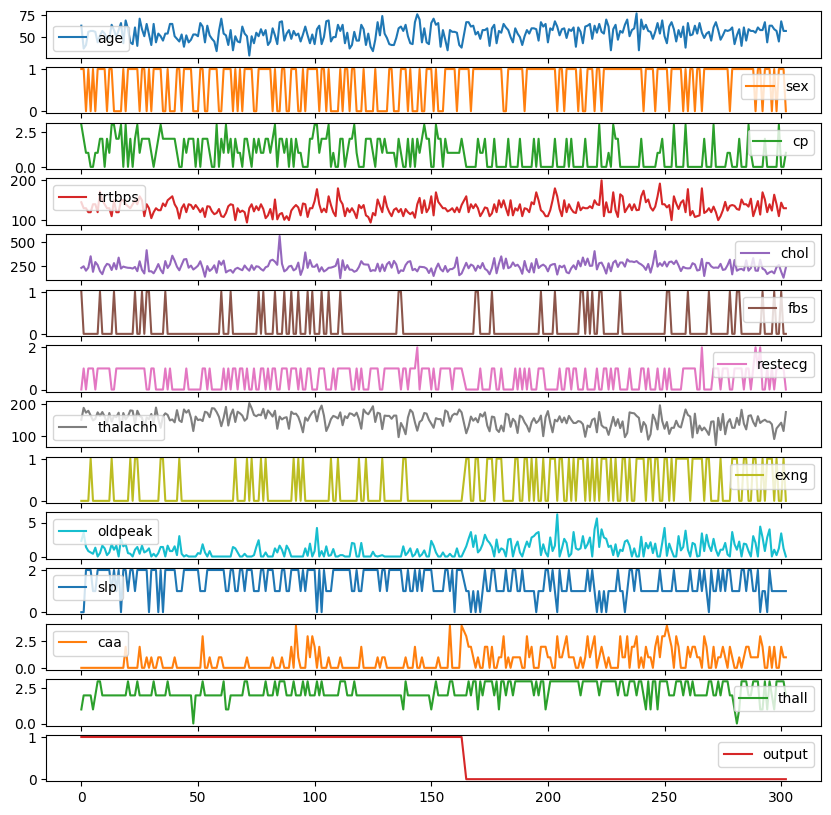

In [ ]:
# пока что мне непонятно, что я тут смогу увидеть
# но тем не менее я попробую, дабы в будущем стать лучше
df.plot(subplots=True, figsize = (10, 10))

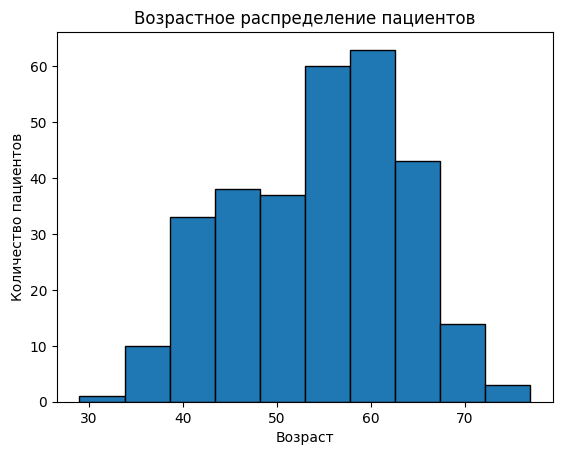

In [ ]:
# гистаграмма частоты распределения возрастов
plt.hist(df['age'], bins=10, edgecolor='black')
plt.title('Возрастное распределение пациентов')
plt.xlabel('Возраст')
plt.ylabel('Количество пациентов')
plt.show()

Сслыка на документацию plt.pie

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html

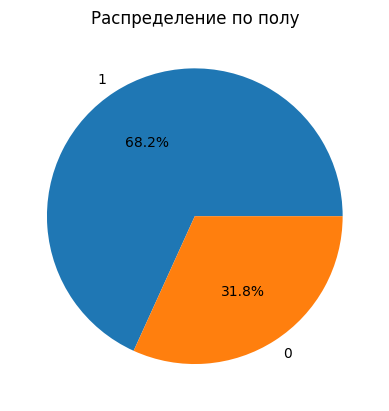

In [ ]:
# распределение по полу
sex_count = df['sex'].value_counts()
plt.pie(sex_count, labels=sex_count.index, autopct='%1.1f%%')
plt.title('Распределение по полу')
plt.show()

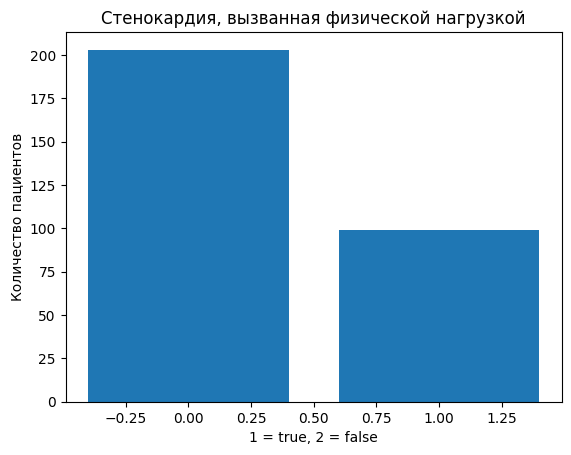

In [ ]:
# стенокардия, вызванная физ. нагрузкой
exang_count = df['exng'].value_counts()
plt.bar(exang_count.index, exang_count.values)
plt.title('Стенокардия, вызванная физической нагрузкой')
plt.xlabel('1 = true, 2 = false')
plt.ylabel('Количество пациентов')
plt.show()

Воспользуюсь бокс плотом для оценки распределения артериального давления у пациентов. Т.к. это более наглядный график.

Ссылка на документацию: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html


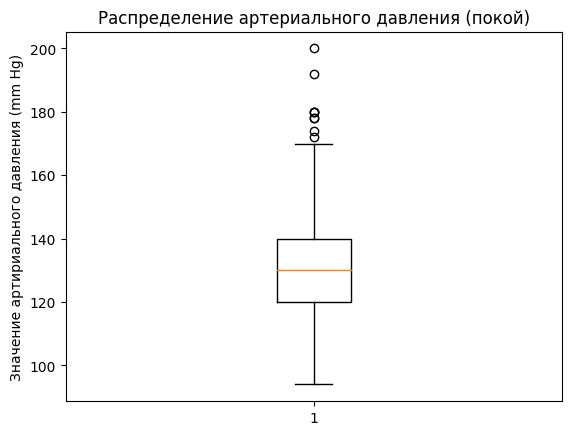

In [ ]:
#Распределение артериального давления (покой)
plt.boxplot(df['trtbps'])
plt.title('Распределение артериального давления (покой)')
plt.ylabel('Значение артириального давления (mm Hg)')
plt.show()

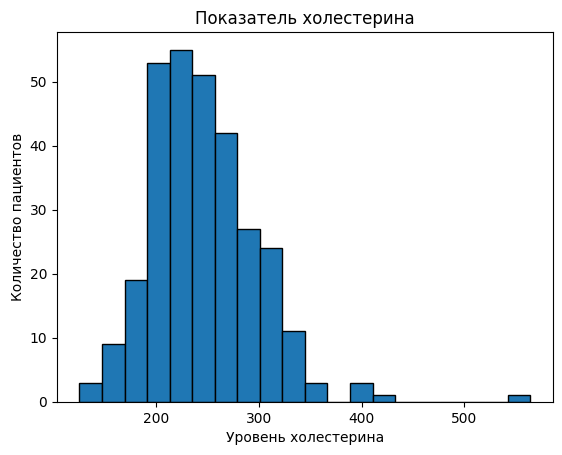

In [ ]:
# Показатель холестерина
plt.hist(df['chol'], bins=20, edgecolor='black')
plt.title('Показатель холестерина')
plt.xlabel('Уровень холестерина')
plt.ylabel('Количество пациентов')
plt.show()

В целом, у большинства холестрин в норме.

Норма общего холестерина от 3,6 ммоль/л до 7,8 ммоль/л, рекомендуемый уровень холестерина < 5 ммоль/л.

Высокий уровень холестерина сигнализирует об угрозе атеросклероза.

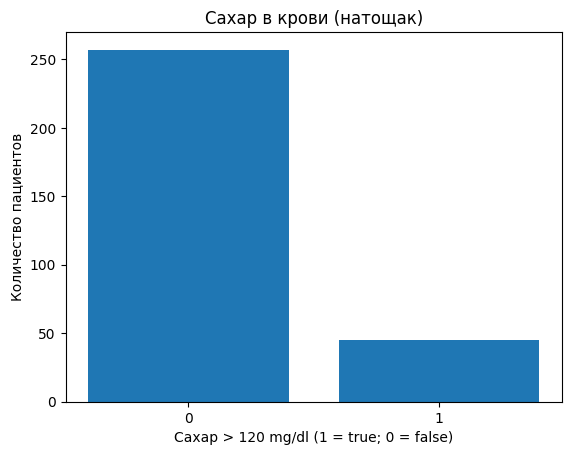

In [ ]:
fbs_count = df['fbs'].value_counts()
plt.bar(fbs_count.index, fbs_count.values)
plt.title('Сахар в крови (натощак)')
plt.xlabel('Сахар > 120 mg/dl (1 = true; 0 = false)')
plt.ylabel('Количество пациентов')
plt.xticks(fbs_count.index)
plt.show()

Нормальный уровень сахара в крови варьируется в пределах 3,3-5,5 ммоль/л. Когда нарушается обмен веществ в организме, клетки тканей перестают правильно усваивать глюкозу, и она начинает накапливаться в крови. Тревожный звонок должен срабатывать, когда уровень глюкозы в крови натощак составляет от 5,6 до 6,9 ммоль/л.

Из данного датасэта, кажется, что предел как раз таки 120 мг/dl.

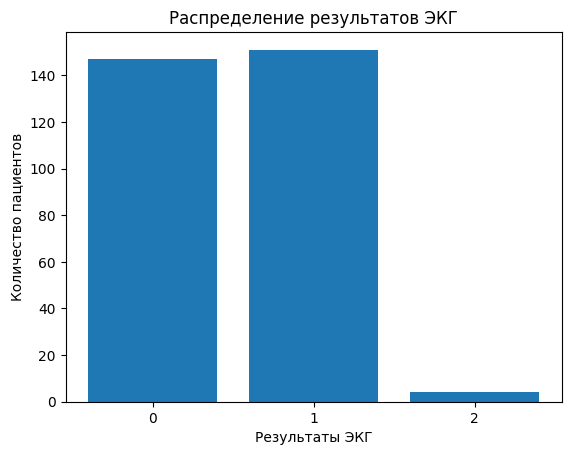

In [ ]:
rest_ecg_count = df['restecg'].value_counts()
plt.bar(rest_ecg_count.index, rest_ecg_count.values)
plt.title('Распределение результатов ЭКГ')
plt.xlabel('Результаты ЭКГ')
plt.ylabel('Количество пациентов')
plt.xticks(rest_ecg_count.index)
plt.show()

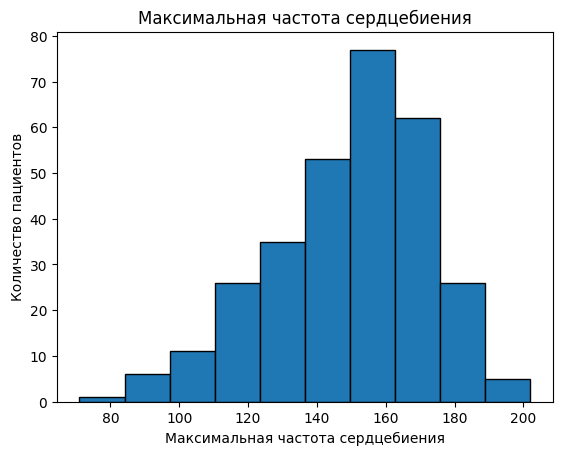

In [ ]:
plt.hist(df['thalachh'], bins=10, edgecolor='black')
plt.title('Максимальная частота сердцебиения')
plt.xlabel('Максимальная частота сердцебиения')
plt.ylabel('Количество пациентов')
plt.show()

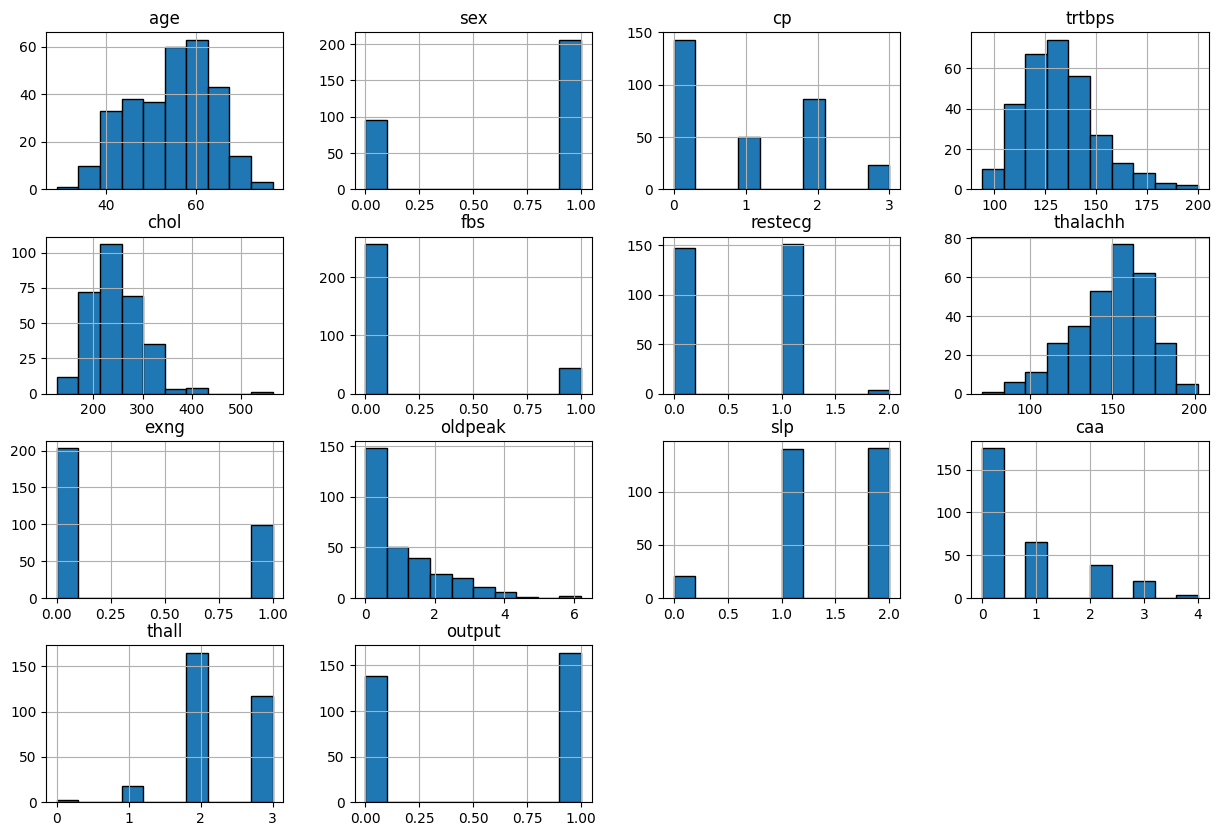

In [ ]:
# посмотрим в общем на гистаграммы распределения наших данных
# на самом деле, вот так смотреть не очень удобно, когда не понимаешь
# спасибо тем людям, кто последовательно разбирал признаки
df.hist(figsize=(15, 10), bins=10, edgecolor='black')
plt.show()

### Двумерный анализ данных (Группировки с целевым признаком)

В тех ноутбуках, которые я исследовал до работы со своим, данные были иные.
Я обучу модель, сдам ДЗ и потом буду разбираться, что же не так!

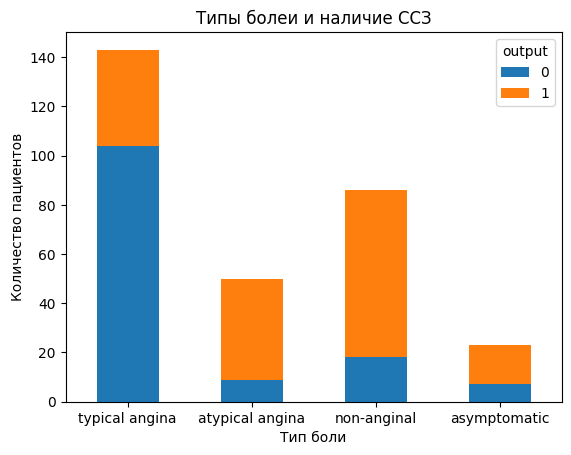

In [ ]:
cp_target = df.groupby(['cp', 'output']).size().unstack().fillna(0)
cp_target.plot(kind='bar', stacked=True)
plt.title('Типы болеи и наличие ССЗ')
plt.xlabel('Тип боли')
plt.ylabel('Количество пациентов')
plt.xticks(ticks=[0,1,2,3], labels=['typical angina', 'atypical angina',
                                    'non-anginal', 'asymptomatic'], rotation=0)
plt.show()

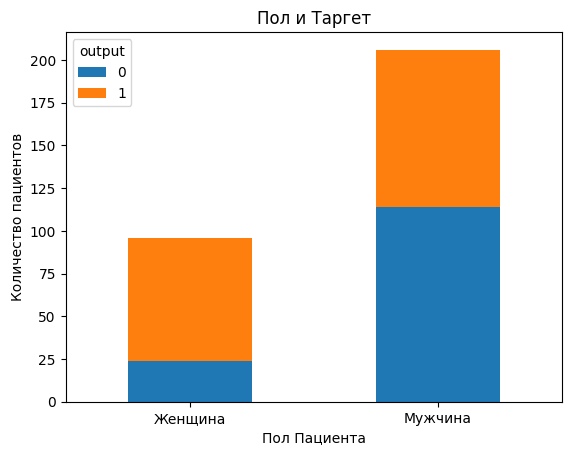

In [ ]:
cp_target = df.groupby(['sex', 'output']).size().unstack().fillna(0)
cp_target.plot(kind='bar', stacked=True)
plt.title('Пол и Таргет')
plt.xlabel('Пол Пациента')
plt.ylabel('Количество пациентов')
plt.xticks(ticks=[0,1], labels=['Женщина', 'Мужчина'], rotation=0)
plt.show()

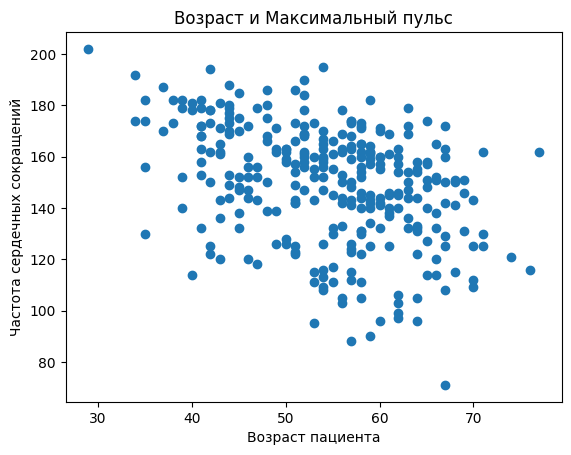

In [ ]:
plt.scatter(df['age'], df['thalachh'])
plt.title('Возраст и Максимальный пульс')
plt.xlabel('Возраст пациента')
plt.ylabel('Частота сердечных сокращений')
plt.show()

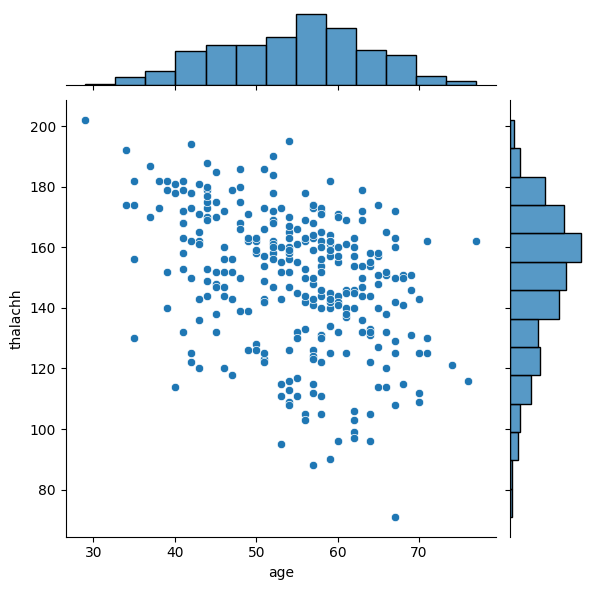

In [ ]:
# использую метод, который есть у нас в занятии 02
# у него много возможностей, но надо научиться юзать
# https://seaborn.pydata.org/generated/seaborn.jointplot.html
sns.jointplot(data=df, x='age', y='thalachh')

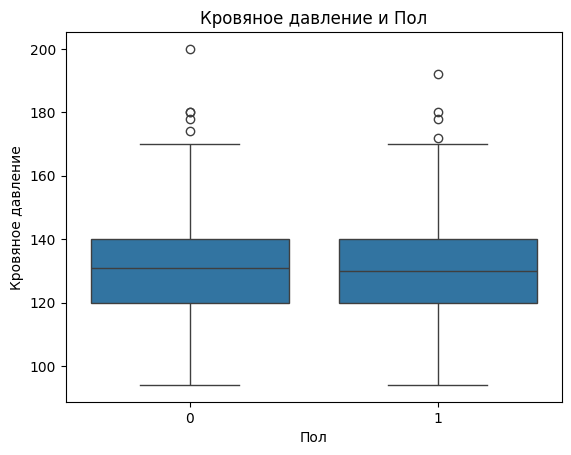

In [ ]:
sns.boxplot(x='sex', y='trtbps', data=df)
plt.title('Кровяное давление и Пол')
plt.xlabel('Пол')
plt.ylabel('Кровяное давление')
plt.show()

Видим, что у большинства давление 120-140, что в целом вялется нормой. Но, разумеется, есть те, у кого с этим показателем проблемы.

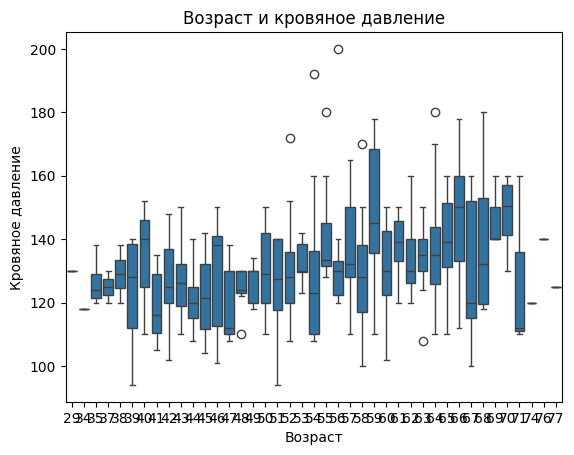

In [ ]:
sns.boxplot(x='age', y='trtbps', data=df)
plt.title('Возраст и кровяное давление')
plt.xlabel('Возраст')
plt.ylabel('Кровяное давление')
plt.show()

В общем и целом, можно пронаблюдать, что чем старше человек, тем его давление становится выше.

Разумеется, это очевидно, ведь сосуды изнашиваются, но тем не менее, в рамках обучения пойдет поглядеть и на такое построение графика.

Хотя так же мы можем наблюдать в самом конце резкое снижение давления, что, весьма странно.

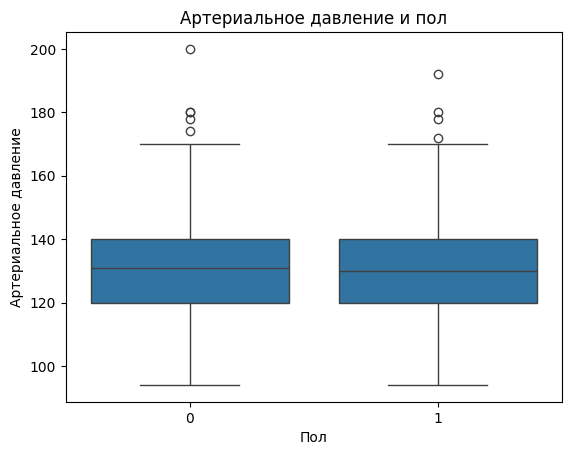

In [ ]:
sns.boxplot(x='sex', y='trtbps', data=df)
plt.title('Артериальное давление и пол')
plt.xlabel('Пол')
plt.ylabel('Артериальное давление')
plt.show()

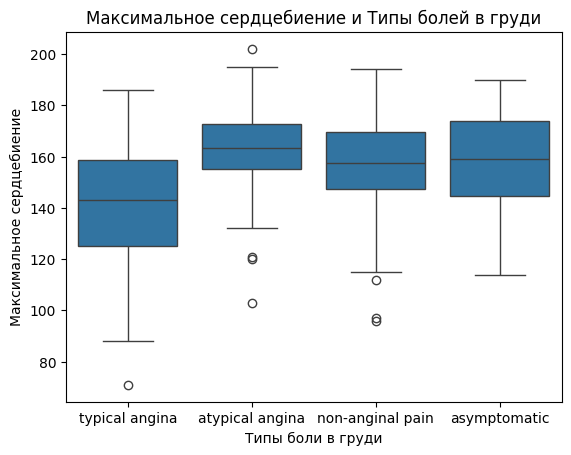

In [ ]:
sns.boxplot(x='cp', y='thalachh', data=df)
plt.title('Максимальное сердцебиение и Типы болей в груди')
plt.xlabel('Типы боли в груди')
plt.ylabel('Максимальное сердцебиение')
plt.xticks(ticks=[0,1,2,3], labels=['typical angina', 'atypical angina',
                                    'non-anginal pain', 'asymptomatic'])
plt.show()

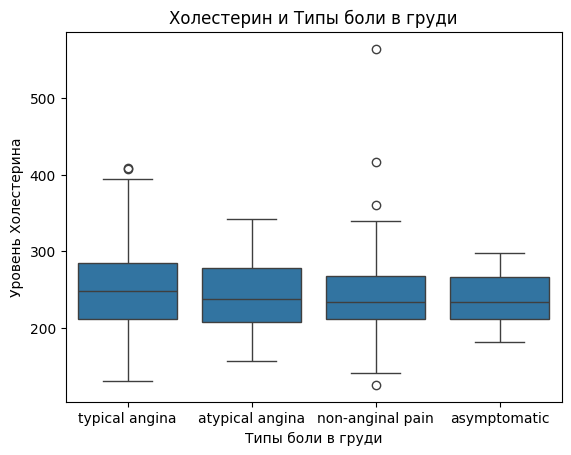

In [ ]:
sns.boxplot(x='cp', y='chol', data=df)
plt.title('Холестерин и Типы боли в груди')
plt.xlabel('Типы боли в груди')
plt.ylabel('Уровень Холестерина')
plt.xticks(ticks=[0,1,2,3], labels=['typical angina', 'atypical angina',
                                    'non-anginal pain', 'asymptomatic'])
plt.show()

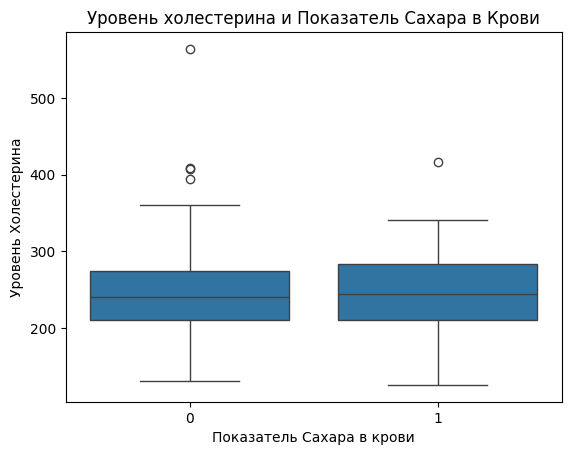

In [ ]:
sns.boxplot(x='fbs', y='chol', data=df)
plt.title('Уровень холестерина и Показатель Сахара в Крови')
plt.xlabel('Показатель Сахара в крови')
plt.ylabel('Уровень Холестерина')
plt.show()

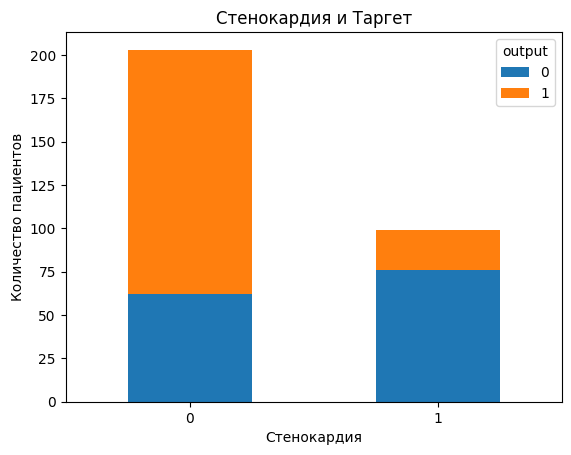

In [ ]:
exang_target = df.groupby(['exng', 'output']).size().unstack().fillna(0)
exang_target.plot(kind='bar', stacked=True)
plt.title('Стенокардия и Таргет')
plt.xlabel('Стенокардия')
plt.ylabel('Количество пациентов')
plt.xticks(rotation=0)
plt.show()

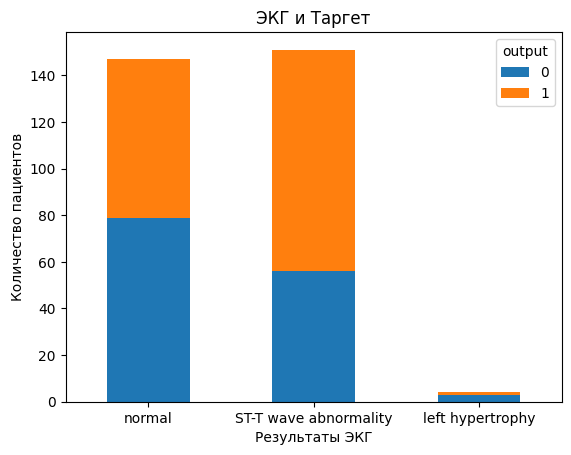

In [ ]:
restecg_target = df.groupby(['restecg', 'output']).size().unstack().fillna(0)
restecg_target.plot(kind='bar', stacked=True)
plt.title('ЭКГ и Таргет')
plt.xlabel('Результаты ЭКГ')
plt.ylabel('Количество пациентов')
plt.xticks(ticks=[0,1,2], labels=['normal', 'ST-T wave abnormality',
                                  'left hypertrophy'], rotation=0)
plt.show()

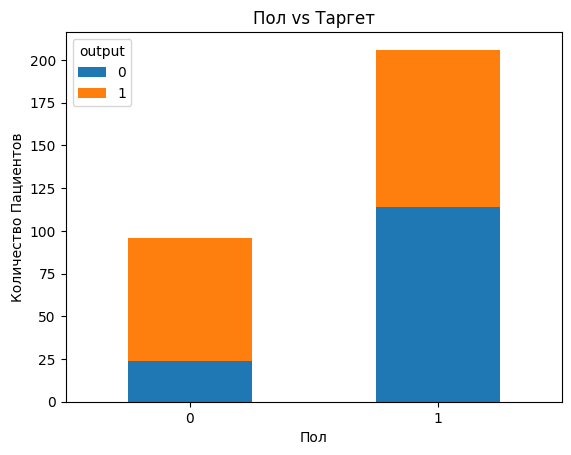

In [ ]:
sex_target = df.groupby(['sex', 'output']).size().unstack().fillna(0)
sex_target.plot(kind='bar', stacked=True)
plt.title('Пол vs Таргет')
plt.xlabel('Пол')
plt.ylabel('Количество Пациентов')
plt.xticks(rotation=0)
plt.show()

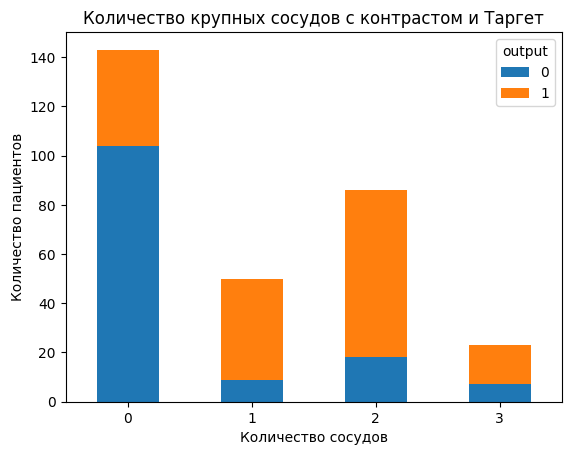

In [ ]:
ca_target = df.groupby(['cp', 'output']).size().unstack().fillna(0)
ca_target.plot(kind='bar', stacked=True)
plt.title('Количество крупных сосудов с контрастом и Таргет')
plt.xlabel('Количество сосудов')
plt.ylabel('Количество пациентов')
plt.xticks(rotation=0)
plt.show()

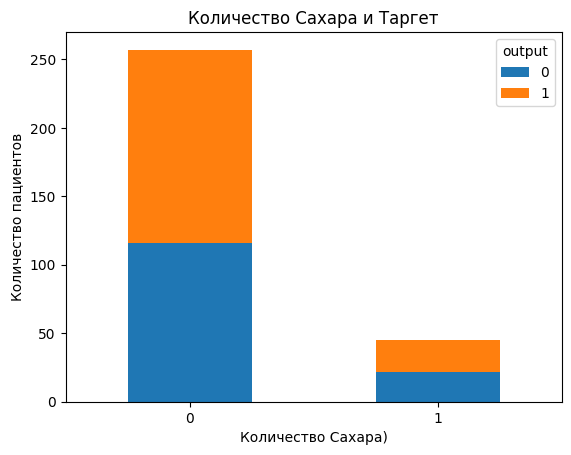

In [ ]:
fbs_target = df.groupby(['fbs', 'output']).size().unstack().fillna(0)
fbs_target.plot(kind='bar', stacked=True)
plt.title('Количество Сахара и Таргет')
plt.xlabel('Количество Сахара)')
plt.ylabel('Количество пациентов')
plt.xticks(rotation=0)
plt.show()

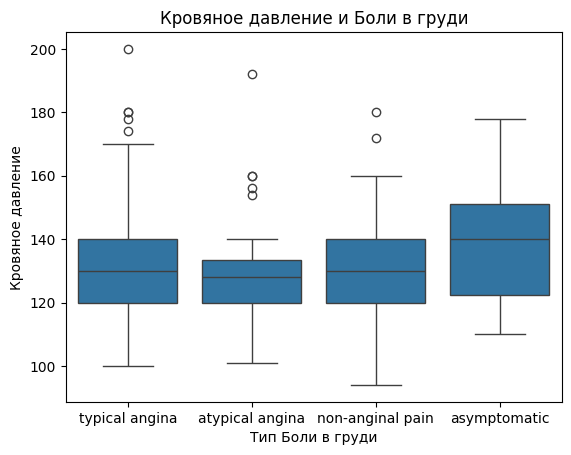

In [ ]:
sns.boxplot(x='cp', y='trtbps', data=df)
plt.title('Кровяное давление и Боли в груди')
plt.xlabel('Тип Боли в груди')
plt.ylabel('Кровяное давление')
plt.xticks(ticks=[0,1,2,3], labels=['typical angina', 'atypical angina',
                                    'non-anginal pain', 'asymptomatic'])
plt.show()

### Баланс классов

In [ ]:
# посмотрим на количество наших значений
# 1 - есть СС заболевание
# 0 - заболевание отсутствует
df['output'].value_counts()

output
1    164
0    138
Name: count, dtype: int64

<ipython-input-38-3f03f5175544>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='output',data=df,palette='RdBu_r')


<Axes: xlabel='output', ylabel='count'>

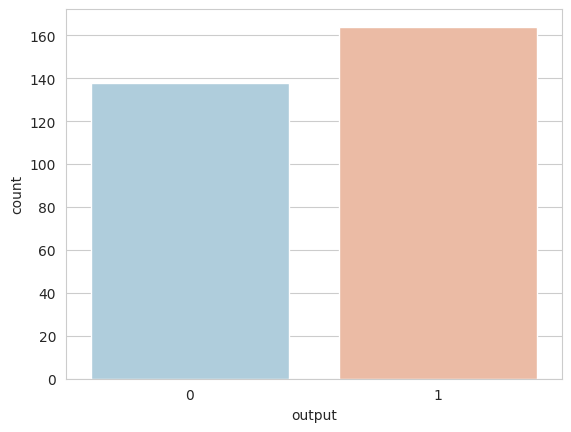

In [ ]:
# данный код я украл, чтобы изучить как можно
# зрительно оценить баланс классов
sns.set_style('whitegrid')
sns.countplot(x='output',data=df,palette='RdBu_r')

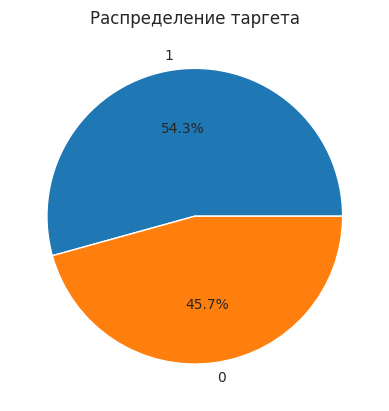

In [ ]:
target_count = df['output'].value_counts()
plt.pie(target_count, labels=target_count.index, autopct='%1.1f%%')
plt.title('Распределение таргета')
plt.show()

Очевидно, что во втором классе у нас данных больше. Но на самом деле в данном случае это несущественно повлияет на результат.

### Линейные корреляции

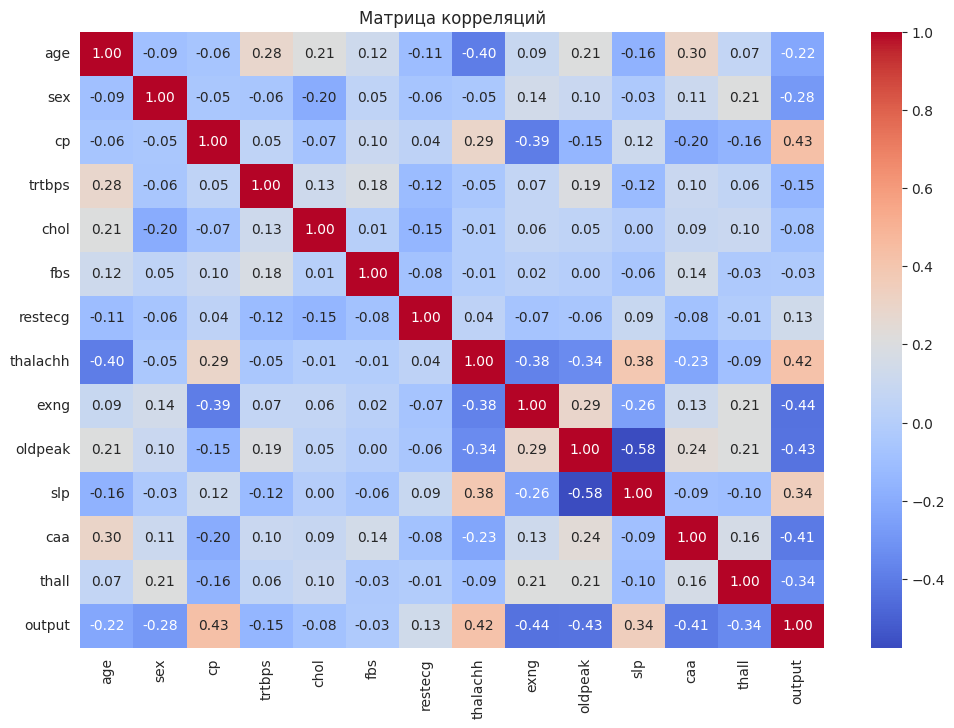

In [ ]:
# взглянем на хитмап и выявим коррелирующие данные, если такое есть
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Матрица корреляций")
plt.show()

Мы наблюдаем заметную отрицательную корреляцию у признаков oldpeak и slp.

Умеренные отрицательные корреляции у thalachh и age, exng и cp, exng и thalachh, exng и output.

Умеренные положительные корреляции у thalachh и slp.

С output умеренно коррелируют cp, thalachh, exng, oldpeak, caa.

В целом это все выглядит очень и очень слабо, чтобы делать какие либо выводы


### Выводы

## Предобработка

Нет необходимости кодировать наши данные, т.к. они все являются числовыми.

Несколько ссылок, которые я прочитал:

https://habr.com/ru/articles/456294/

https://scikit-learn.org//stable/modules/generated/sklearn.preprocessing.LabelEncoder.html


https://scikit-learn.org//stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

### Стандартизация

Шпаргалка по scikit-learn

https://vc.ru/u/1389654-machine-learning/670935-shpargalka-scikit-learn-funkcii-dlya-mashinnogo-obucheniya

- StandardScaler

Эта функция используется для стандартизации набора данных путём вычитания среднего значения и деления на стандартное отклонение. Она часто используется для подготовки данных для алгоритмов, требующих стандартизированного ввода.

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder

In [ ]:
scaler = StandardScaler()

for col in ['age','trtbps','chol','fbs','thalachh','exng','oldpeak','caa']:
    df[col] = scaler.fit_transform(df[col].values.reshape(-1, 1))

In [ ]:
# взглянем на стандартизированный возраст
df['age']

0      0.949794
1     -1.928548
2     -1.485726
3      0.174856
4      0.285561
         ...   
298    0.285561
299   -1.042904
300    1.503322
301    0.285561
302    0.285561
Name: age, Length: 302, dtype: float64

### Кодирование данных

Нам, кодирование данных вообще не нужно, т.к. они у нас и так численные.

- LabelEncoder

Эта функция используется для программирования категориальных переменных как целых чисел. Она часто используется для подготовки данных для алгоритмов, которые не могут обрабатывать категориальные переменные.

In [ ]:
le = LabelEncoder()

for col in ['sex','cp','restecg','slp','thall']:
    df[col] = le.fit_transform(df[col])

In [ ]:
df['slp']

0      0
1      0
2      2
3      2
4      2
      ..
298    1
299    1
300    1
301    1
302    1
Name: slp, Length: 302, dtype: int64

## Обучение алгоритма и перебор гиперпараметров

### KNN

*Гипотеза компактности:*

Координаты образцов одного и того же класса в признаковом пространстве концентрируются в геометрически близки точки, образуя "компактные" сгустки.

Если анализ признакового пространства показывает, что гипотеза компактности в целом выполняется, то для задач классификации можно применять, так называемые метрические методы (основанные на расстояниях).

#### Ссылки на документацию по KNN


- KNeighborsClassifier - https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

- train_test_split - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

- accuracy_score - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

- https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_k-%D0%B1%D0%BB%D0%B8%D0%B6%D0%B0%D0%B9%D1%88%D0%B8%D1%85_%D1%81%D0%BE%D1%81%D0%B5%D0%B4%D0%B5%D0%B9 - Нормализация данных

In [ ]:
# скопирую данные, дабы у нас ничего не поломалось,
# когда я буду работать далее с другими алгоритмами
df_KNN = df.copy()
df_KNN.shape

(302, 14)

In [ ]:
X = np.array(df_KNN[df.drop(columns=['output']).columns])
y = df['output'].values

In [ ]:
X

array([[ 0.94979429,  1.        ,  3.        , ...,  0.        ,
        -0.71491124,  1.        ],
       [-1.92854796,  1.        ,  2.        , ...,  0.        ,
        -0.71491124,  2.        ],
       [-1.48572607,  0.        ,  1.        , ...,  2.        ,
        -0.71491124,  2.        ],
       ...,
       [ 1.50332164,  1.        ,  0.        , ...,  1.        ,
         1.27497996,  3.        ],
       [ 0.28556146,  1.        ,  0.        , ...,  1.        ,
         0.28003436,  3.        ],
       [ 0.28556146,  0.        ,  1.        , ...,  1.        ,
         0.28003436,  2.        ]])

In [ ]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

#### Обучение KNN

In [ ]:
# импортируем модули, необходимые для обучения и оценки
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split # функция разделения на train test
from sklearn.metrics import accuracy_score # доля верно угаданных ответов
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# разбиваем матрицу признаков и ответы на обучающую и тестовую выборки (80 / 20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# посмотрим на наше разбиение
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(241, 13) (61, 13) (241,) (61,)


In [ ]:
# предварительно циклом потыкаем разное количество соседей
# количество соседей
n = 30
k_range = range(1, n+1)
#сюда будем класть значения метрик качества
scores = {}
scores_list = []
# цикл, в котором будем обучать модель
for k in k_range:
  # инициализируем алгоритм
  knn = KNeighborsClassifier(n_neighbors=k)
  # обучаем модель
  knn.fit(X_train, y_train)
  # получаем прогнозы на основе признаков test
  knn_preds = knn.predict(X_test)
  # сравниваем полученные прогнозы с реальными ответами test
  scores[k] = accuracy_score(y_test, knn_preds)
  scores_list.append(accuracy_score(y_test, knn_preds))

In [ ]:
scores

{1: 0.819672131147541,
 2: 0.819672131147541,
 3: 0.8524590163934426,
 4: 0.819672131147541,
 5: 0.8032786885245902,
 6: 0.819672131147541,
 7: 0.8360655737704918,
 8: 0.8524590163934426,
 9: 0.8524590163934426,
 10: 0.8688524590163934,
 11: 0.8852459016393442,
 12: 0.8688524590163934,
 13: 0.8852459016393442,
 14: 0.9016393442622951,
 15: 0.9016393442622951,
 16: 0.8852459016393442,
 17: 0.8852459016393442,
 18: 0.8688524590163934,
 19: 0.8688524590163934,
 20: 0.8688524590163934,
 21: 0.8524590163934426,
 22: 0.8524590163934426,
 23: 0.8688524590163934,
 24: 0.8524590163934426,
 25: 0.8688524590163934,
 26: 0.8524590163934426,
 27: 0.8524590163934426,
 28: 0.8524590163934426,
 29: 0.8688524590163934,
 30: 0.8688524590163934}

Лучший скор у 14 и 15 соседей

#### Подбор гиперпараметров

In [ ]:
# Будем использовать модель k ближайших соседей
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

In [ ]:
# значение, которое будет принимать наше число соседей
np.array(np.linspace(1, 100, 10), dtype='int')

array([  1,  12,  23,  34,  45,  56,  67,  78,  89, 100])

In [ ]:
# подбор гиперпараметров по сетке с использованием Cross-Validation
from sklearn.model_selection import GridSearchCV

# Зададим сетку - среди каких значений выбирать наилучший параметр.
knn_grid = {
    'n_neighbors': np.array(np.linspace(1, 100, 10), dtype='int'), # перебираем по параметру <<n_neighbors>>, по сетке заданной np.linspace(2, 100, 10)
    #'metric': ['minkowski', 'euclidean']}
}


# Создаем объект кросс-валидации
gs = GridSearchCV(knn, knn_grid, cv=5, n_jobs=-1)

# Обучаем его
gs.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([  1,  12,  23,  34,  45,  56,  67,  78,  89, 100])})

In [ ]:
pd.DataFrame(gs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001693,0.000317,0.010039,0.001368,1,{'n_neighbors': 1},0.704918,0.737705,0.733333,0.766667,0.650000,0.718525,0.039460,10
1,0.001589,0.000171,0.011753,0.000787,12,{'n_neighbors': 12},0.819672,0.868852,0.833333,0.783333,0.733333,0.807705,0.046183,4
2,0.001585,0.000172,0.010974,0.002016,23,{'n_neighbors': 23},0.836066,0.868852,0.850000,0.816667,0.733333,0.820984,0.047036,1
3,0.001557,0.000043,0.012889,0.002938,34,{'n_neighbors': 34},0.836066,0.852459,0.850000,0.766667,0.733333,0.807705,0.048603,4
4,0.001493,0.000077,0.012235,0.001804,45,{'n_neighbors': 45},0.819672,0.836066,0.850000,0.833333,0.750000,0.817814,0.035248,2
5,0.001457,0.000126,0.010362,0.000277,56,{'n_neighbors': 56},0.836066,0.803279,0.833333,0.800000,0.716667,0.797869,0.043230,9
6,0.001496,0.000146,0.012479,0.002377,67,{'n_neighbors': 67},0.836066,0.803279,0.833333,0.800000,0.733333,0.801202,0.037040,6
7,0.001460,0.000096,0.011675,0.001142,78,{'n_neighbors': 78},0.819672,0.852459,0.833333,0.833333,0.733333,0.814426,0.041869,3
8,0.001498,0.000099,0.010783,0.001104,89,{'n_neighbors': 89},0.819672,0.786885,0.816667,0.833333,0.733333,0.797978,0.035698,7
9,0.001494,0.000072,0.010818,0.001371,100,{'n_neighbors': 100},0.819672,0.786885,0.816667,0.833333,0.733333,0.797978,0.035698,7


In [ ]:
# Функция отрисовки графиков
from matplotlib import pyplot as plt


def grid_plot(x, y, x_label, title, y_label='cross_val'):
    plt.figure(figsize=(12, 6))
    plt.grid(True)
    plt.plot(x, y, 'go-')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

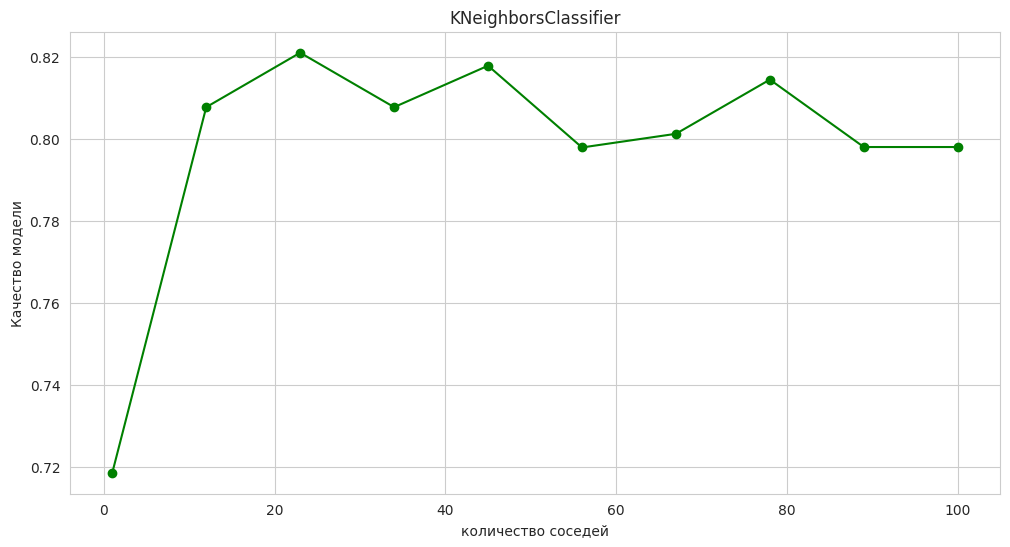

In [ ]:
# Строим график зависимости качества от числа соседей
# замечание: результаты обучения хранятся в атрибуте cv_results_ объекта gs

grid_plot(knn_grid['n_neighbors'], gs.cv_results_['mean_test_score'], 'количество соседей', 'KNeighborsClassifier', 'Качество модели')

In [ ]:
knn_grid = {'n_neighbors': np.array(np.linspace(40, 70, 11), dtype='int')}
gs = GridSearchCV(knn, knn_grid, cv=10)
gs.fit(X, y)

# best_params_ содержит в себе лучшие подобранные параметры, best_score_ лучшее качество
gs.best_params_, gs.best_score_

({'n_neighbors': 46}, 0.8144086021505377)

Интересно, что судя по графику, можно видеть, что результат 0.82, достигается при 22 +- соседях.

Но лучшими параметрами и качеством выдаются 46 и качество 0.814.

Хм... Интересно почему так? Надо будет почитать об этом!

#### Нормирование данных

In [ ]:
X.T.std(axis=1)
# X.std()

array([1.        , 0.46565287, 1.03033354, 1.        , 1.        ,
       1.        , 0.52515554, 1.        , 1.        , 1.        ,
       0.61525282, 1.        , 0.61200976])

In [ ]:
X = (X - X.T.mean())/X.T.std()

In [ ]:
X.mean(axis=0)

array([-0.40024938,  0.20294017,  0.45182907, -0.40024938, -0.40024938,
       -0.40024938,  0.06531926, -0.40024938, -0.40024938, -0.40024938,
        0.83541077, -0.40024938,  1.64649575])

In [ ]:
X.std(axis=0)

array([0.88428759, 0.41177106, 0.91111117, 0.88428759, 0.88428759,
       0.88428759, 0.46438853, 0.88428759, 0.88428759, 0.88428759,
       0.54406043, 0.88428759, 0.54119263])

In [ ]:
X = (X - X.mean(axis=0))/X.std(axis=0)
X

array([[ 0.94979429,  0.68265615,  1.97647049, ..., -2.27118179,
        -0.71491124, -2.1479552 ],
       [-1.92854796,  0.68265615,  1.005911  , ..., -2.27118179,
        -0.71491124, -0.51399432],
       [-1.48572607, -1.46486632,  0.0353515 , ...,  0.97951442,
        -0.71491124, -0.51399432],
       ...,
       [ 1.50332164,  0.68265615, -0.93520799, ..., -0.64583368,
         1.27497996,  1.11996657],
       [ 0.28556146,  0.68265615, -0.93520799, ..., -0.64583368,
         0.28003436,  1.11996657],
       [ 0.28556146, -1.46486632,  0.0353515 , ..., -0.64583368,
         0.28003436, -0.51399432]])

In [ ]:
from sklearn.preprocessing import scale
X_scaled = scale(np.array(X, dtype='float'), with_std=True, with_mean=True)

In [ ]:
X_scaled

array([[ 0.94979429,  0.68265615,  1.97647049, ..., -2.27118179,
        -0.71491124, -2.1479552 ],
       [-1.92854796,  0.68265615,  1.005911  , ..., -2.27118179,
        -0.71491124, -0.51399432],
       [-1.48572607, -1.46486632,  0.0353515 , ...,  0.97951442,
        -0.71491124, -0.51399432],
       ...,
       [ 1.50332164,  0.68265615, -0.93520799, ..., -0.64583368,
         1.27497996,  1.11996657],
       [ 0.28556146,  0.68265615, -0.93520799, ..., -0.64583368,
         0.28003436,  1.11996657],
       [ 0.28556146, -1.46486632,  0.0353515 , ..., -0.64583368,
         0.28003436, -0.51399432]])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# мин и макс шкалирование
scaler = MinMaxScaler()
# инициализируем на основе данных X
scaler.fit(X)
# трансформируем X (потом этим же объектом scaler трансформируем test)
scaler.transform(X)

array([[0.70833333, 1.        , 1.        , ..., 0.        , 0.        ,
        0.33333333],
       [0.16666667, 1.        , 0.66666667, ..., 0.        , 0.        ,
        0.66666667],
       [0.25      , 0.        , 0.33333333, ..., 1.        , 0.        ,
        0.66666667],
       ...,
       [0.8125    , 1.        , 0.        , ..., 0.5       , 0.5       ,
        1.        ],
       [0.58333333, 1.        , 0.        , ..., 0.5       , 0.25      ,
        1.        ],
       [0.58333333, 0.        , 0.33333333, ..., 0.5       , 0.25      ,
        0.66666667]])

In [ ]:
(X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

array([[0.70833333, 1.        , 1.        , ..., 0.        , 0.        ,
        0.33333333],
       [0.16666667, 1.        , 0.66666667, ..., 0.        , 0.        ,
        0.66666667],
       [0.25      , 0.        , 0.33333333, ..., 1.        , 0.        ,
        0.66666667],
       ...,
       [0.8125    , 1.        , 0.        , ..., 0.5       , 0.5       ,
        1.        ],
       [0.58333333, 1.        , 0.        , ..., 0.5       , 0.25      ,
        1.        ],
       [0.58333333, 0.        , 0.33333333, ..., 0.5       , 0.25      ,
        0.66666667]])

#### GridSearchCV при нормированных признаках

{'n_neighbors': 34} 0.830967741935484


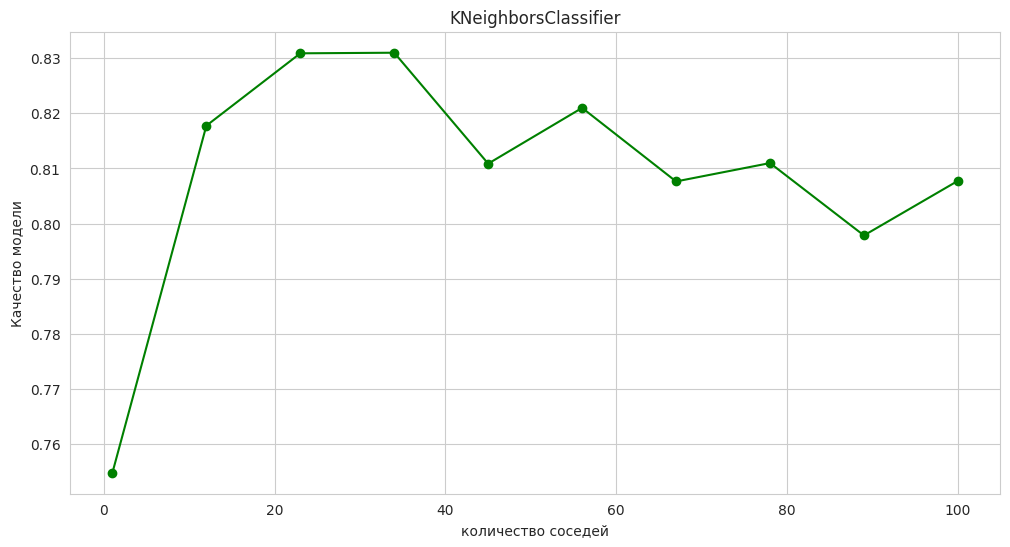

In [ ]:
# обучение идентично предыдущим, но в этот раз нормированные значения
grid = {'n_neighbors': np.array(np.linspace(1, 100, 10), dtype='int')}
gs = GridSearchCV(knn, grid, cv=10)
gs.fit(X_scaled, y)

print(gs.best_params_, gs.best_score_)

grid_plot(grid['n_neighbors'], gs.cv_results_['mean_test_score'],'количество соседей', 'KNeighborsClassifier', 'Качество модели')

При 34ех соседях, лучшее качество становится 0.83

{'n_neighbors': 55} 0.8275268817204301


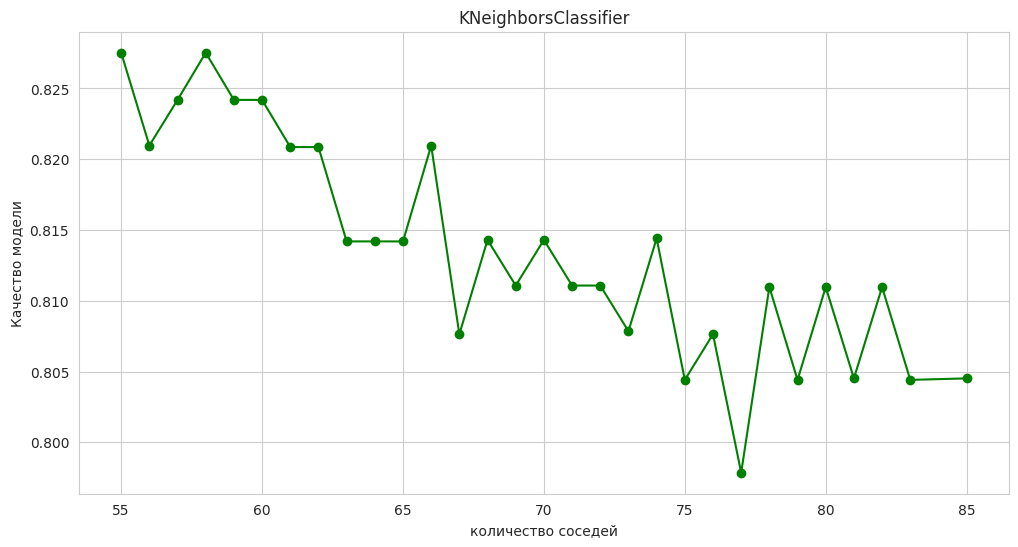

In [ ]:
# все тот же код, перебираем другие значения
grid = {'n_neighbors': np.array(np.linspace(55, 85, 30), dtype='int')}
gs = GridSearchCV(knn, grid, cv=10, n_jobs=5)
gs.fit(X_scaled, y)
print(gs.best_params_, gs.best_score_)
grid_plot(grid['n_neighbors'], gs.cv_results_['mean_test_score'],'количество соседей', 'KNeighborsClassifier', 'Качество модели')

In [ ]:
from sklearn import metrics

print(f'knn\t=\t{accuracy_score(y_test, knn_preds)}')

knn	=	0.8688524590163934


### LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

logmodel = LogisticRegression(max_iter=300)
logmodel.fit(X_train, y_train)

log_pred = logmodel.predict(X_test)



### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()

In [ ]:
model.fit(X_train,y_train)
rf=model.predict(X_test)
metrics.accuracy_score(y_test,rf)

0.8524590163934426

### Decison Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [ ]:
model.fit(X_train,y_train)
dt=model.predict(X_test)
metrics.accuracy_score(y_test,dt)

0.819672131147541

## Метрики моделей и выводы

In [ ]:
print(60*'-')
print(18*' ', 'Метрики качества моделей', 18*' ')
print(60*'-')
print('Модель KNN')
print(60*'-')
print(classification_report(y_test, knn_preds))
print(60*'-')
print('Модель: Decision Tree')
print(60*'-')
print(classification_report(y_test, dt))
print(60*'-')
print('Модель: Random Forest')
print(60*'-')
print(classification_report(y_test, rf))
print(60*'-')
print('Модель: LogisticRegression')
print(60*'-')
print(classification_report(y_test, log_pred))

------------------------------------------------------------
                   Метрики качества моделей                   
------------------------------------------------------------
Модель KNN
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

------------------------------------------------------------
Модель: Decision Tree
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.76      0.90      0.83        29
           1       0.89      0.75      0.81        32

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61


Исходя и вышележащей ячейки, можно сделать следующие выводы:



По метрике precision лучшая модель: KNN

По метрике recall лучшая модель: KNN

По метрике f-1 score лучшая модель: KNN



Вывод: модель KNN лучше остальных справилась с данной задачей.